In [1]:
import json
with open('samples.json', 'r') as json_file:
    data = json.load(json_file)

import pandas as pd
from harvesttext import HarvestText

ht = HarvestText()
df = pd.DataFrame(data).T
df

,major,grade,answer1,answer2
sample0,English,third,"""Liberal arts is an education in the fundament...","""\""I've found that studying liberal arts has g..."
sample1,Political Science,first,"""(Eric thinks for a moment) To me, liberal art...","""\""(Eric smiles) I've found that the liberal a..."
sample2,Political Science,second,"""Liberal arts is the education system that foc...","""I have always enjoyed reading and analyzing d..."
sample3,English,third,"""Liberal arts is a field of study that involve...","""\""I have found liberal arts education to be e..."
sample4,Sociology,first,"""Well, I guess liberal arts is more like a lea...","""\""Hmm, I'd say my experience of liberal arts ..."
...,...,...,...,...
sample995,Economics,third,"""I think liberal arts is a very broad educatio...","""\""I've found that the liberal arts education ..."
sample996,Psychology,second,"""To be honest, I was also confused about the d...","""\""I've been able to take classes in a wide ra..."
sample997,Biology,fourth,"""I think liberal arts is a way of learning tha...","""\""My experience of liberal arts education has..."
sample998,Pre-Medical or Pre-Health Sciences,first,"""Liberal arts is the idea of learning the art ...","""\""I've found that liberal arts education enco..."


In [2]:
df['critical_thinking'] = [True if 'criti' in i else False for i in df['answer1']]
df['creativity'] = [True if 'crea' in i or 'inno' in i else False for i in df['answer1']]
df['all-rounded'] = [True if 'round' in i or 'overall' in i  else False for i in df['answer1']]
df['wide_range_of_knowledge'] = [True if ('wide' in i or 'variety' in i) and 'subject' in i else False for i in df['answer1']]
df['communication'] = [True if 'commun' in i else False for i in df['answer1']]
df

,major,grade,answer1,answer2,critical_thinking,creativity,all-rounded,wide_range_of_knowledge,communication
sample0,English,third,"""Liberal arts is an education in the fundament...","""\""I've found that studying liberal arts has g...",True,False,False,False,True
sample1,Political Science,first,"""(Eric thinks for a moment) To me, liberal art...","""\""(Eric smiles) I've found that the liberal a...",False,False,False,False,False
sample2,Political Science,second,"""Liberal arts is the education system that foc...","""I have always enjoyed reading and analyzing d...",True,True,False,False,True
sample3,English,third,"""Liberal arts is a field of study that involve...","""\""I have found liberal arts education to be e...",True,False,True,False,True
sample4,Sociology,first,"""Well, I guess liberal arts is more like a lea...","""\""Hmm, I'd say my experience of liberal arts ...",False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
sample995,Economics,third,"""I think liberal arts is a very broad educatio...","""\""I've found that the liberal arts education ...",True,True,True,False,False
sample996,Psychology,second,"""To be honest, I was also confused about the d...","""\""I've been able to take classes in a wide ra...",False,False,False,False,False
sample997,Biology,fourth,"""I think liberal arts is a way of learning tha...","""\""My experience of liberal arts education has...",True,True,False,False,True
sample998,Pre-Medical or Pre-Health Sciences,first,"""Liberal arts is the idea of learning the art ...","""\""I've found that liberal arts education enco...",False,False,True,False,False


<BarContainer object of 5 artists>

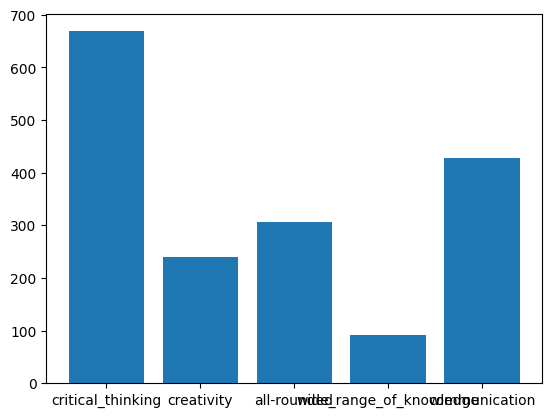

In [3]:
from matplotlib import pyplot as plt


plt.bar(df.columns[4:], [len(df[df[i]]) for i in df.columns[4:]])

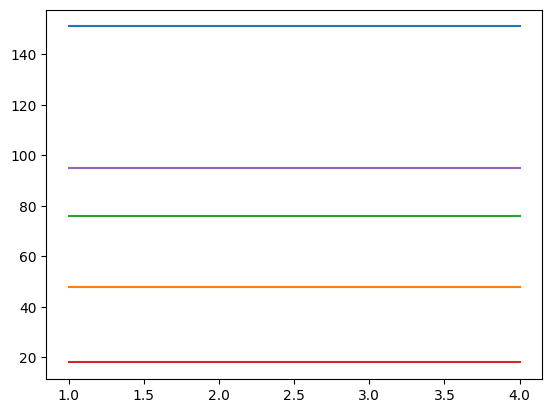

In [4]:
for j in df.columns[4:]:
    plt.plot([1, 2, 3, 4], [len(df[(df[j]) & (df['grade'] == 'first')]) for i in ['first', 'second', 'third', 'fourth']])

In [5]:
science_majors = [
    "Nursing",
    "Biology",
    "Computer Science",
    "Environmental Science/Studies",
    "Engineering",
    "Pre-Medical or Pre-Health Sciences",
    "Mathematics",
    "Chemistry"
]

non_science_majors = [
    "Business Administration",
    "Psychology",
    "Political Science",
    "English",
    "Economics",
    "Communications",
    "Education",
    "Sociology",
    "History",
    "Art and Design",
    "Social Work",
    "Anthropology"
]


([<matplotlib.patches.Wedge at 0x1ce0b68d450>,
 [Text(0.2769047043327299, 1.0645768101543465, 'science major'),
  Text(-0.27690480400560347, -1.0645767842286524, 'non-science major')])

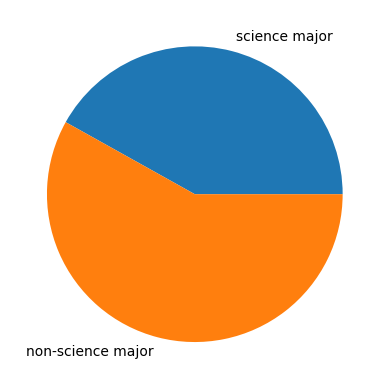

In [6]:
plt.pie([len(df[df['major'].isin(science_majors)])/1000,
         len(df[df['major'].isin(non_science_majors)])/1000,
        ], labels=['science major', 'non-science major'])

([<matplotlib.patches.Wedge at 0x1ce0b682890>,
 [Text(-0.04588166056977235, 1.0990427076430471, 'science major'),
  Text(0.04588186636938024, -1.0990426990515256, 'non-science major')])

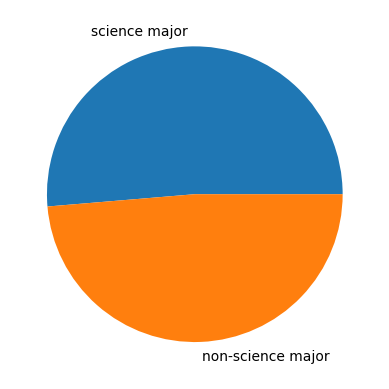

In [7]:
plt.pie([len(df[(df['critical_thinking']) & (df['major'].isin(science_majors))])/len(df[df['major'].isin(science_majors)]),
        len(df[(df['critical_thinking']) & (df['major'].isin(non_science_majors))])/len(df[df['major'].isin(non_science_majors)]),
        ], labels=['science major', 'non-science major'])

([<matplotlib.patches.Wedge at 0x1ce0b63ad10>,
 [Text(0.10693173772648551, 1.094790209796742, 'science major'),
  Text(-0.10693184022814188, -1.0947901997850653, 'non-science major')])

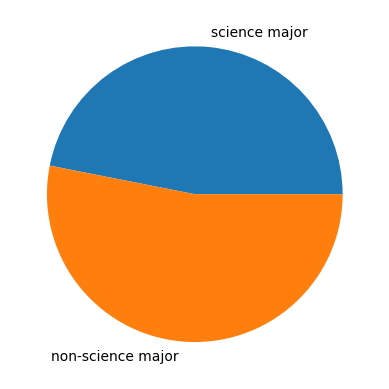

In [8]:
plt.pie([len(df[(df['creativity']) & (df['major'].isin(science_majors))])/len(df[df['major'].isin(science_majors)]),
        len(df[(df['creativity']) & (df['major'].isin(non_science_majors))])/len(df[df['major'].isin(non_science_majors)]),
        ], labels=['science major', 'non-science major'])

([<matplotlib.patches.Wedge at 0x1ce0b62d790>,
 [Text(-0.05022674936264798, 1.098852707895131, 'science major'),
  Text(0.05022685224466335, -1.0988527031925586, 'non-science major')])

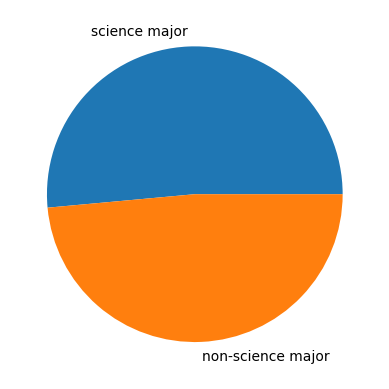

In [9]:
plt.pie([len(df[(df['all-rounded']) & (df['major'].isin(science_majors))])/len(df[df['major'].isin(science_majors)]),
        len(df[(df['all-rounded']) & (df['major'].isin(non_science_majors))])/len(df[df['major'].isin(non_science_majors)]),
        ], labels=['science major', 'non-science major'])

([<matplotlib.patches.Wedge at 0x1ce0e796050>,
 [Text(0.13827584099089185, 1.0912743888675578, 'science major'),
  Text(-0.13827573881840885, -1.0912744018138716, 'non-science major')])

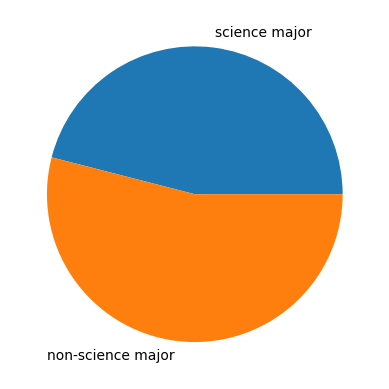

In [10]:
plt.pie([len(df[(df['wide_range_of_knowledge']) & (df['major'].isin(science_majors))])/len(df[df['major'].isin(science_majors)]),
        len(df[(df['wide_range_of_knowledge']) & (df['major'].isin(non_science_majors))])/len(df[df['major'].isin(non_science_majors)]),
        ], labels=['science major', 'non-science major'])

([<matplotlib.patches.Wedge at 0x1ce0e7dbe50>,
 [Text(-0.06316984222595153, 1.0981846707330913, 'science major'),
  Text(0.0631697394064818, -1.098184676647474, 'non-science major')])

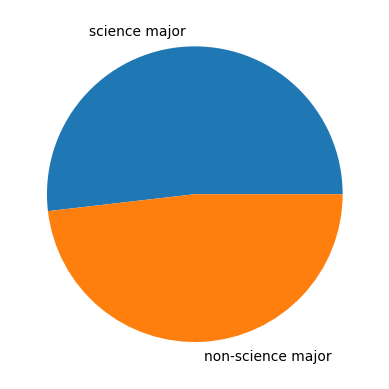

In [11]:
plt.pie([len(df[(df['communication']) & (df['major'].isin(science_majors))])/len(df[df['major'].isin(science_majors)]),
        len(df[(df['communication']) & (df['major'].isin(non_science_majors))])/len(df[df['major'].isin(non_science_majors)]),
        ], labels=['science major', 'non-science major'])

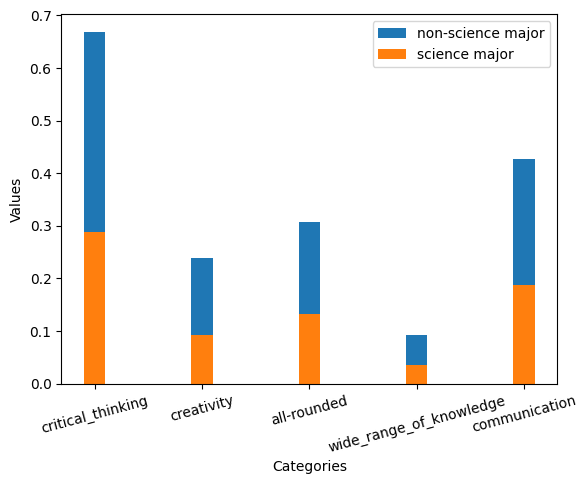

In [12]:
import matplotlib.pyplot as plt

# Data
categories = df.columns[4:]
segment1 = [(len(df[(df[i]) & (df['major'].isin(science_majors))])/1000) for i in categories]
segment2 = [(len(df[(df[i]) & (df['major'].isin(science_majors))])/1000) + (len(df[(df[i]) & (df['major'].isin(non_science_majors))])/1000) for i in categories]

x = range(len(categories))

plt.bar(x, segment2, width=0.2, label='non-science major')
plt.bar(x, segment1, width=0.2, label='science major')


plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('')
plt.xticks(x, categories)
plt.xticks(rotation=15)

plt.legend()

plt.show()

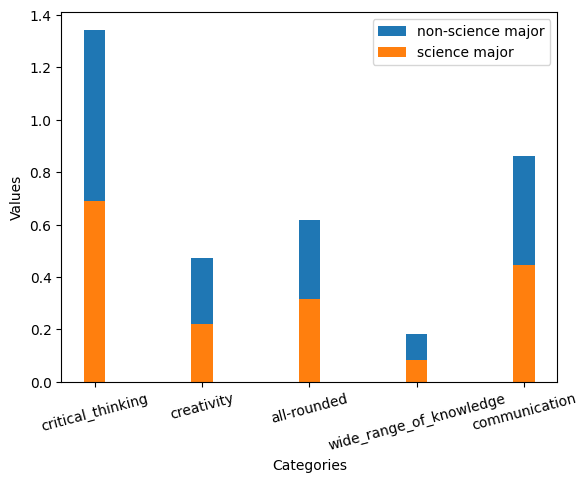

In [13]:
# Data
categories = df.columns[4:]
segment1 = [(len(df[(df[i]) & (df['major'].isin(science_majors))])/len(df[df['major'].isin(science_majors)])) for i in df.columns[4:]]
segment2 = [(len(df[(df[i]) & (df['major'].isin(science_majors))])/len(df[df['major'].isin(science_majors)])) + (len(df[(df[i]) & (df['major'].isin(non_science_majors))])/len(df[df['major'].isin(non_science_majors)])) for i in df.columns[4:]]

x = range(len(categories))

plt.bar(x, segment2, width=0.2, label='non-science major')
plt.bar(x, segment1, width=0.2, label='science major')


plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('')
plt.xticks(x, categories)
plt.xticks(rotation=15)

plt.legend()

plt.show()

In [14]:
import statsmodels.api as sm

for i in df.columns[4:]:
    z_stat, p_value = sm.stats.proportions_ztest(
        [len(df[(df[i]) & (df['major'].isin(science_majors))]), 
         len(df[(df[i]) & (df['major'].isin(non_science_majors))])], 
         [len(df[df['major'].isin(science_majors)]), 
          len(df[df['major'].isin(non_science_majors)])])
    
    alpha = 0.05
    if p_value < alpha:
        print(f"there's a significant difference in considering {i} as part of liberal arts education between science students and non-science students")
    else:
        print(f"there's no significant difference in considering {i} as part of liberal arts education between science students and non-science students")

there's no significant difference in considering critical_thinking as part of liberal arts education between science students and non-science students
there's no significant difference in considering creativity as part of liberal arts education between science students and non-science students
there's no significant difference in considering all-rounded as part of liberal arts education between science students and non-science students
there's no significant difference in considering wide_range_of_knowledge as part of liberal arts education between science students and non-science students
there's no significant difference in considering communication as part of liberal arts education between science students and non-science students
